In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)

int16 -32768 32767 (129, 157) (157,)


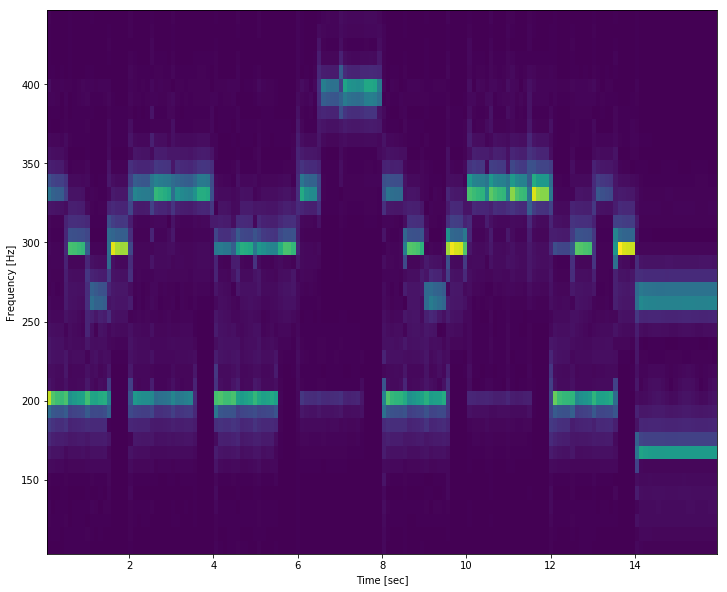

In [126]:
def spectogram_from_file(filename, low_cutoff=100, high_cutoff=450, offset=0):
    sample_rate, samples = wavfile.read(filename)
    samples = samples[offset:]
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    
    print(samples.dtype, np.min(samples), np.max(samples), spectrogram.shape, times.shape)
    
    mask = (frequencies < high_cutoff) & (frequencies > low_cutoff)
    plt.pcolormesh(times, frequencies[mask], spectrogram[ mask, :] ** 0.5)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
spectogram_from_file('Chips2-2200Hz-Mary_MIDI-input.wav')

int16 -32768 32767 (129, 86) (86,)
int16 -32368 32767 (129, 92) (92,)


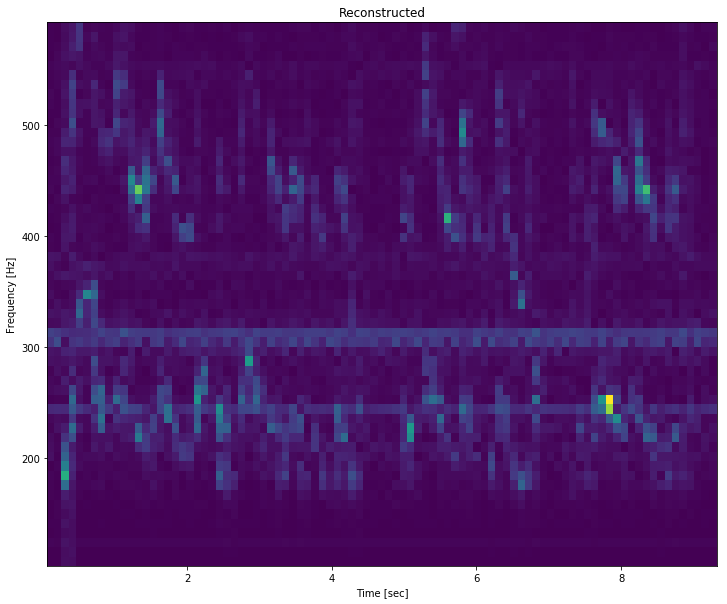

In [127]:
plt.title('Ground Truth')
spectogram_from_file('ground-truth-audio/Chips1-2200Hz-Mary_Had-input_resampled_to_video_rate.wav', 100, 600)
plt.savefig('images/chips1-mary-voice-original.png', bbox_inches='tight')
plt.clf()

plt.title('Reconstructed')
spectogram_from_file('reconstructed-audio/chips1-mary-voice.wav', 100, 600, offset=2200)
plt.savefig('images/chips1-mary-voice-reconstruted.png', bbox_inches='tight')

int16 -32768 32767 (129, 157) (157,)
int16 -31927 32767 (129, 164) (164,)


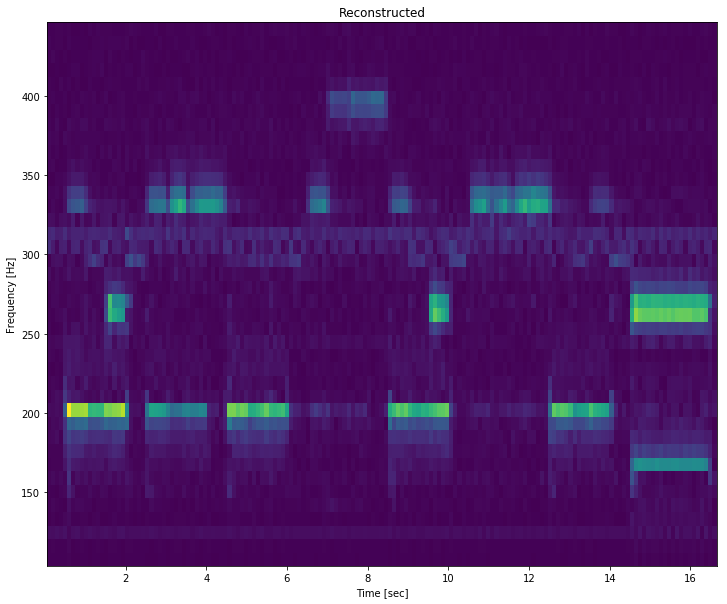

In [128]:

plt.title('Ground Truth')
spectogram_from_file('ground-truth-audio/Chips2-2200Hz-Mary_MIDI-input.wav', 100, 450)
plt.savefig('images/plant-mary-original.png', bbox_inches='tight')
plt.clf()

plt.title('Reconstructed')
spectogram_from_file('reconstructed-audio/plant-mary.wav', 100, 450, offset=2200)
plt.savefig('images/plant-mary-rconstructed.png', bbox_inches='tight')

int16 -32768 32767 (129, 157) (157,)
int16 -27288 27927 (129, 160) (160,)


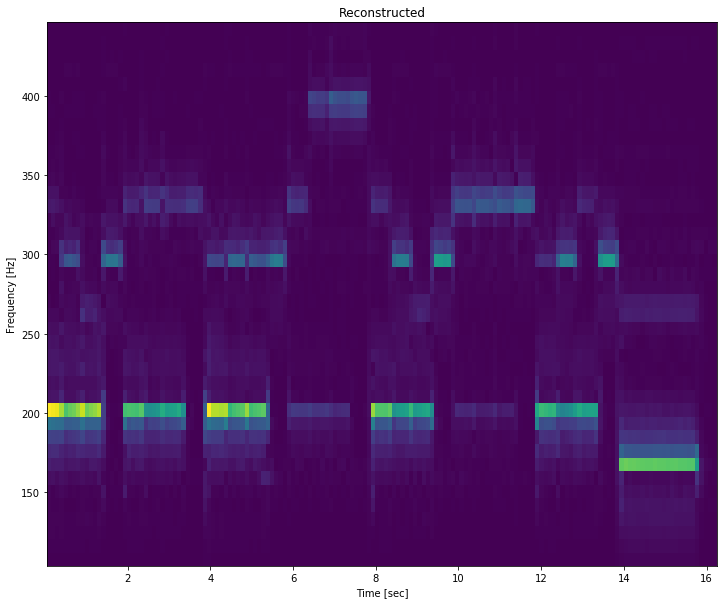

In [129]:
plt.title('Ground Truth')
spectogram_from_file('ground-truth-audio/Chips2-2200Hz-Mary_MIDI-input.wav', 100, 450)
plt.savefig('images/chips2-mary-original.png', bbox_inches='tight')
plt.clf()
plt.title('Reconstructed')
spectogram_from_file('reconstructed-audio/chips2-mary.wav', 100, 450, offset=2200)
plt.savefig('images/chips2-mary-reconstructed.png', bbox_inches='tight')

# Experimentation area: Ignore below x.x

In [5]:
samples[:10]

array([ -4941, -16682, -17334,  -8824,  13758,  25121,  21977,  18803,
         8128,    663], dtype=int16)

In [32]:
data = np.load('chips1-mary-voice.npz')

In [33]:
s1, s2, amp = data['arr_0'], data['arr_1'], data['arr_2']
s1, s2, amp = [x[1:] for x in s1], [x[1:] for x in s2], [x[1:] for x in amp]

In [62]:
s1, s2, amp = s1[2], s2[2], amp[2]
s1, s2, amp = np.array([x for x in s1]), np.array([x for x in s2]), np.array([x for x in amp])

(38072,)

In [56]:
arrays = [s1[2], s2[2], s1[1], s2[1], s1[0], s2[0]]
arrays = [np.array([x for x in ary]) for ary in arrays]
res = np.array(arrays[0])

# for i in range(len(arrays)):
#     sos = signal.butter(5, (150, 1000), 'bandpass', fs=2200, output='sos')
#     arrays[i] = signal.sosfilt(sos, arrays[i])
    
def align_and_add(res, x1, x2):
    print(x1.shape, x2.shape)
    
    q = [np.sum(x1[i:] * x2[:-i]) for i in range(1, 250)]
    tmax = np.argmax(q) + 1
    print(q[:10])
    print(tmax)
    res[tmax:] += x2[:-tmax]
    
for i in range(1, len(arrays)):
    align_and_add(res, arrays[0], arrays[i])

(22848,) (22848,)
[171.62477, 169.22467, 165.62363, 160.88943, 155.13159, 148.8196, 142.61664, 136.963, 131.99667, 127.68022]
1
(22848,) (22848,)
[245.56331, 235.42427, 223.00264, 209.81567, 195.54732, 180.69337, 167.31622, 156.92831, 149.05548, 142.69992]
1
(22848,) (22848,)
[716.7522, 703.37964, 683.6379, 658.7218, 629.2678, 597.4435, 566.86725, 540.3736, 518.72314, 501.62756]
1
(22848,) (22848,)
[956.3096, 924.20325, 888.1764, 852.6799, 813.56616, 769.6007, 726.8813, 690.75616, 659.1421, 628.02576]
1
(22848,) (22848,)
[2554.398, 2512.6272, 2450.87, 2371.6753, 2276.1228, 2171.4053, 2069.9263, 1980.8896, 1905.7822, 1842.9159]
1


In [63]:

q = [np.sum(s1[i:] * s2[:-i]) for i in range(1, 250)]
res = np.array(s1)
tmax = np.argmax(q) + 1
res[tmax:] = res[tmax:] + s2[:-tmax]

In [11]:
r1 = np.average((s1 * amp ).reshape(s1.shape[0], -1), axis=1)
r2 = np.average((s2 * amp ).reshape(s1.shape[0], -1), axis=1)
res = np.array(r1)

In [226]:
q = [np.sum(r1[i:] * r2[:-i]) for i in range(1, 250)]

In [227]:
tmax = np.argmax(q) + 1
res[tmax:] = res[tmax:] + r2[:-tmax]

In [228]:
np.sum(res)

0.048585646

In [91]:
np.max(q)

65.13697

In [75]:
def generate_spec(samples, sample_rate, min_freq=100, max_freq = 450):
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    mask = (frequencies < max_freq) & (frequencies > min_freq)

    plt.pcolormesh(times, frequencies[mask], spectrogram[ mask, :])
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

In [76]:
filtered.dtype

dtype('float64')

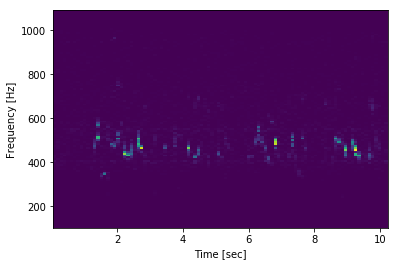

In [77]:
sos = signal.butter(5, (400, 1000), 'bandpass', fs=2200, output='sos')
filtered = signal.sosfilt(sos, res)

# for fx in np.arange(250, 1000, 50):
#     sos2 = signal.butter(5, (fx, 1000), 'bandpass', fs=2200, output='sos')
#     filtered2 = signal.sosfilt(sos2, res)
#     filtered += filtered2 * 0.4

wav_res = np.clip((32767 * filtered / np.max(filtered)).astype('i2'), -32767, 32767)

generate_spec(wav_res, 2200, max_freq=1100)
wavfile.write('reconstructed-chips1-mary-voice.wav', 2200, wav_res)

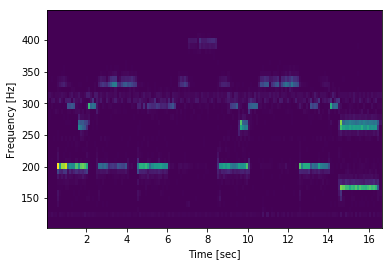

In [147]:
sos = signal.butter(5, (150, 550), 'bandpass', fs=2200, output='sos')
filtered = signal.sosfilt(sos, res)

# for fx in [200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
#     sos2 = signal.butter(5, (fx, 500), 'bandpass', fs=2200, output='sos')
#     filtered2 = signal.sosfilt(sos2, res)
#     filtered += filtered2 * 0.3

generate_spec(filtered[2000:], 2200)

In [19]:
wav_res = np.clip((32767 * filtered / np.max(filtered)).astype('i2'), -32767, 32767)
wavfile.write('reconstructed-chips1-mary-voice.wav', 2200, wav_res)

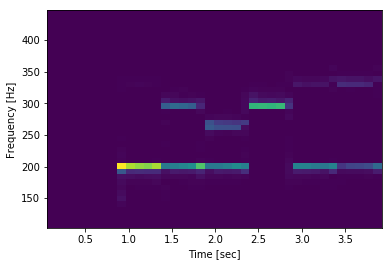

In [72]:
sample_rate, samples = wavfile.read('reconstructed.wav')
frequencies, times, spectrogram = signal.spectrogram(samples[:8800], sample_rate)

mask = (frequencies < 450) & (frequencies > 100)

plt.pcolormesh(times, frequencies[mask], spectrogram[ mask, :])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [259]:
np.std(samples)

12420.510986923022

In [260]:
np.std(wav_res)

11674.189652402016

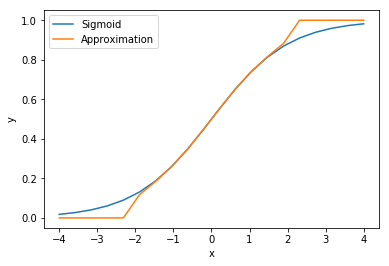

In [173]:
x = np.linspace(-4, 4, 20)
plt.plot(x, np.exp(x) / (1 + np.exp(x)), label='Sigmoid')
y = 1/2 + x / 4 - x ** 3 / 48 + x ** 5 / 480
plt.plot(x, y * (x < 2) * (x > -2) + (x > 2), label='Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.savefig('/Users/rahulgovind/HoneyBadgerMPC/notebooks/sigmoid.png', bbox_inches='tight')

In [160]:
data = np.load('plant-mary.npz')
arr = data['arr_0'][:, :, 1:].astype(np.float64)
arr = arr.reshape(-1, arr.shape[2])

In [166]:
def align_and_add(res, x1, x2):
    print(x1.shape, x2.shape)
    
    q = [np.sum(x1[i:] * x2[:-i]) for i in range(1, 250)]
    tmax = np.argmax(q) + 1
    print(q[:10])
    print(tmax)
    res[tmax:] += x2[:-tmax]

def combine(arrays, base=0, filt=None):
    assert arrays.ndim == 2
    res = np.zeros_like(arr[0])
    for i in range(len(arrays)):
        x1 =arrays[base]
        x2 = arrays[i]
        if filt is not None:
            x1 = filt(x1)
            x2 = filt(x2)
        align_and_add(res, x1, x2)
    return res

combined_signal = combine(arr, 4,
                          lambda x: signal.sosfilt(signal.butter(11, (100, 550), 'bandpass', fs=2200, output='sos'), 
                                                   x))

(38975,) (38975,)
[41.53466790897205, 8.461419495265432, -25.138146646782424, -42.38045184313614, -37.807131969918686, -18.442711992299543, 2.8058535707833343, 15.873779576972835, 18.653152739854246, 15.910514995916023]
67
(38975,) (38975,)
[28.76170685314505, -1.3244887794169609, -31.94421274709814, -42.31595388974083, -26.59808824045715, 4.7782962479996485, 34.25687079515212, 49.0256581327681, 47.65252389338237, 38.04647733137686]
135
(38975,) (38975,)
[-0.8594711746185286, -10.334529337928345, -20.037792912722033, -17.463345123922398, 0.19175398502131724, 25.20024318242733, 45.640678342835805, 53.45897225208573, 48.737694228376185, 37.89533057718629]
135
(38975,) (38975,)
[-29.97718272514432, -13.290742725296072, 3.606494532939646, 17.619054718640903, 26.869269429377923, 30.86022906412558, 30.28879464834425, 26.576744266638723, 21.272983001255927, 15.54561193487469]
138
(38975,) (38975,)
[18.365799998007716, 6.736457856395644, -5.355711056089543, -12.525412179052147, -13.16280835841

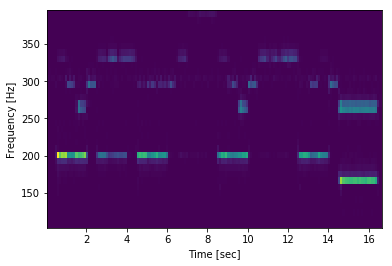

In [185]:
sos = signal.butter(11, (150, 550), 'bandpass', fs=2200, output='sos')
filtered = signal.sosfilt(sos, combined_signal)
generate_spec(filtered[2200:], 2200, max_freq=400)
wav_res = np.clip((32767 * filtered / np.max(filtered)).astype('i2'), -32767, 32767)
wavfile.write('reconstructed-plant-mary.wav', 2200, wav_res)

In [168]:
from logmmse import logmmse_from_file

In [184]:
output = logmmse_from_file('reconstructed-plant-mary.wav', window_size=2000)
wavfile.write('reconstructed-plant-mary-denoised.wav', 2200, output)

In [182]:
output = logmmse_from_file('reconstructed-chips1-mary-voice.wav', window_size=2000)
wavfile.write('reconstructed-chips1-mary-voice-denoised.wav', 2200, output)

In [5]:
signal.butter(2, (150, 550), 'bandpass', fs=2200, output='ba')

(array([ 0.17787929,  0.        , -0.35575859,  0.        ,  0.17787929]),
 array([ 1.        , -1.61026096,  1.21713214, -0.60402372,  0.21713214]))